# 多項式特徴量を実装する

In [10]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('mpg') # mile per gallon
df.dropna(inplace=True)


<Axes: xlabel='horsepower', ylabel='mpg'>

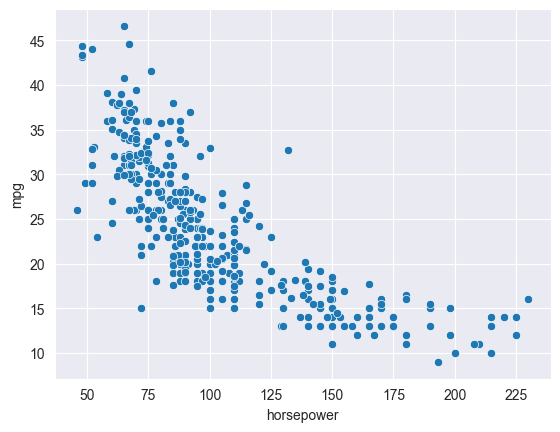

In [11]:
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
sns.scatterplot(x = df['horsepower'], y=df['mpg'])

In [19]:
# 多項式特徴量
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [20]:
#線形回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

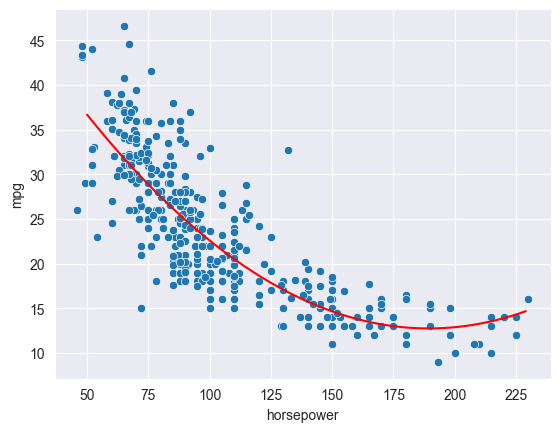

In [21]:
#描画
import numpy as np
import matplotlib.pyplot as plt
x_axis = np.arange(50, 230).reshape(-1, 1)
x_axis_ = poly.fit_transform(x_axis)
pred = model.predict(x_axis_)
sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.plot(x_axis, pred, 'r')


# charenge 多項式回帰と線形回帰の精度を比較する

In [32]:
#でーたの準備
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

#線形回帰
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
cv = RepeatedKFold(n_splits=5,n_repeats=3, random_state=0)
lr = LR()
scores = cross_val_score(lr,X, y, cv=cv, scoring='neg_mean_squared_error')
print(-np.mean(scores))

# mse_list = []
# for train_index, test_index in cv.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     lr.fit(X_train, y_train)
#     y_pred = lr.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     mse_list.append(mse)
# print(np.mean(mse_list))

24.23539180137201


In [33]:
#多項式回帰 degree=2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
lr = LinearRegression()
scores = cross_val_score(lr, X_poly, y, cv=cv, scoring='neg_mean_squared_error')
print(-np.mean(scores))

19.294969517171676


In [34]:
#多項式回帰　degree=3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False)
poly.fit(X)
X_poly_3 = poly.transform(X)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
lr =LinearRegression()
scores = cross_val_score(lr, X_poly_3, y, cv=cv, scoring='neg_mean_squared_error')
print(-np.mean(scores))

19.433811692985614


# KNN回帰　k最近傍法

<Axes: ylabel='mpg'>

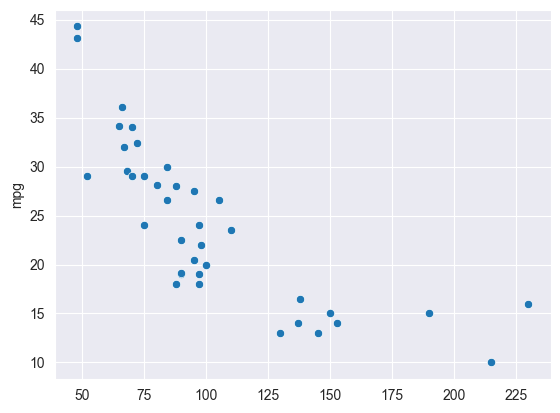

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0 )
sns.scatterplot(x=X_train[:,0], y=y_train)

In [41]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

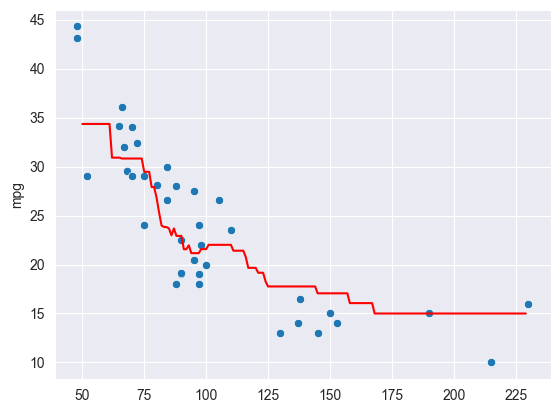

In [44]:
x_axis = np.arange(50, 230).reshape(-1, 1)
y_pred = model.predict(x_axis)
sns.scatterplot(x=X_train[:, 0], y=y_train)
plt.plot(x_axis, y_pred, 'r')

# CHARENGE　kNN回帰　比較

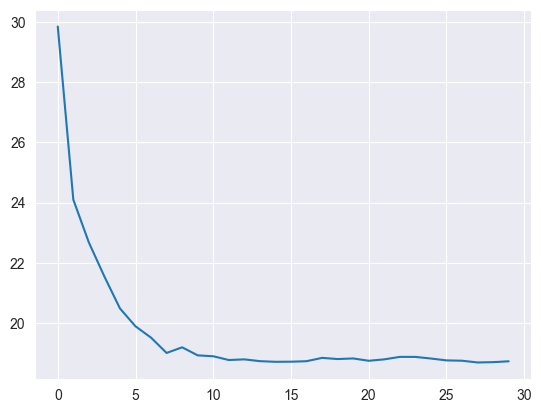

In [47]:
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
n_repeats = 3
n_splits = 5
cv = RepeatedKFold(n_repeats=n_repeats, n_splits=n_splits, random_state=0)
mse_list = []
for k in range(1, 31):
    model = KNeighborsRegressor(k)
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    mse = -np.mean(scores)
    mse_list.append(mse)

plt.plot(mse_list)


# 正則化項

## Ridge

In [49]:
 df = pd.read_csv('https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv')

In [50]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [52]:
# 欠損値の対応
df.dropna(inplace=True)  #inplaxe=Trueでdf=という形にしなくてもｄｆに格納される

In [71]:
#でーたの準備
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
# 標準化のために数値カラムのリストを作成
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()
#ダミー変数化は、数値カラムのリスト作成の後
X = pd.get_dummies(X, drop_first=True)
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) #testデータをスケーリングすることを忘れない

#モデル学習
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
#予測
y_pred = ridge.predict(X_test)
#MSEの算出
from sklearn.metrics import  mean_squared_error
mse = mean_squared_error(y_test, y_pred)
#わかりにくいのでMAEを算出
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

#linearRegressionでもやってみる線形回帰 比較のため
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [70]:
#Ridgeモデルの係数を表示する
pd.DataFrame(data=ridge.coef_, index=X.columns)

,0
AtBat,-255.993525
Hits,265.416208
HmRun,49.854509
Runs,-43.441534
RBI,6.408273
Walks,126.644640
Years,-39.997881
CAtBat,-180.022672
CHits,242.394671
CHmRun,-36.096063


In [72]:
#LRモデルの係数を表示
pd.DataFrame(data=lr.coef_, index=X.columns)

,0
AtBat,-269.109817
Hits,272.908879
HmRun,59.976695
Runs,-55.375124
RBI,3.615042
Walks,131.082955
Years,-14.782026
CAtBat,-514.201106
CHits,550.223699
CHmRun,-12.295546


## ↑のようにLRモデルは、Ridgeモデルより係数が全体的に高いことがわかる
## 係数を下げるメリット:モデルの複雑性を下げて、varianceを下げることに繋がる。それによりモデルの精度の向上につながる　
## 解釈性の点では改善しないことに注意


# Challenge さまざまなλのRidgeの精度を比較する

In [110]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['Salary']
X = df.drop(columns='Salary')
#標準化のための数値カラムをリスト化する
numeric_cols = X.select_dtypes(np.number).columns.to_list()
X = pd.get_dummies(X, drop_first=True)
#hold_out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
#モデル学習
alpha_list = np.logspace(-3, 3)
mse_list = []
theta_list = []
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    #予測
    y_pred = ridge.predict(X_test)
    #評価
    mse_list.append(mean_squared_error(y_test, y_pred))
    theta_list.append(ridge.coef_)


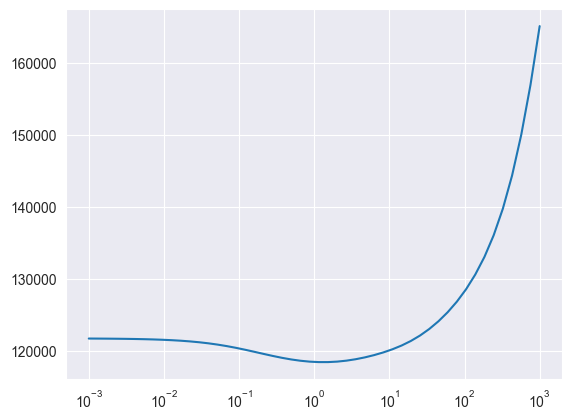

In [111]:
#λを増加させた時のMSEの推移をplot
plt.plot(alpha_list, mse_list)
plt.xscale('log')
plt.show()

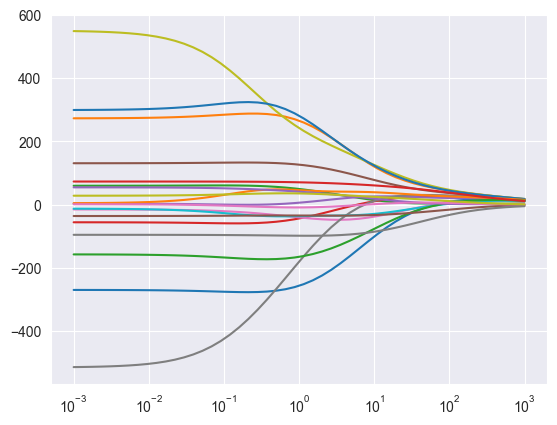

In [112]:
#λを増加させた時の特徴量の係数θの推移をplot
plt.plot(alpha_list, theta_list)
plt.xscale('log')

# Lassoを実装する

In [117]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

250.24481877112999


In [122]:
#lassoの係数
pd.DataFrame(lasso.coef_, index=X.columns)

,0
AtBat,-263.934704
Hits,267.528826
HmRun,42.603440
Runs,-33.864199
RBI,7.616388
Walks,125.232517
Years,-29.825645
CAtBat,-239.244478
CHits,330.305041
CHmRun,-4.114144


In [123]:
#ridgeの係数
pd.DataFrame(ridge.coef_, index=X.columns)

,0
AtBat,13.739896
Hits,17.488860
HmRun,9.756808
Runs,15.578288
RBI,14.068502
Walks,15.934569
Years,10.480438
CAtBat,16.040478
CHits,18.254926
CHmRun,11.631283


In [124]:
#lrの係数
pd.DataFrame(lr.coef_, index=X.columns)

,0
AtBat,-269.109817
Hits,272.908879
HmRun,59.976695
Runs,-55.375124
RBI,3.615042
Walks,131.082955
Years,-14.782026
CAtBat,-514.201106
CHits,550.223699
CHmRun,-12.295546


# Challenge  さまざまなλでのLassoの精度を比較しよう

In [129]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [137]:
df.dropna(inplace=True)
y = df['Salary']
X = df.drop(columns='Salary')
#数値カラムのカラム名をリスト化する
numeric_cols = X.select_dtypes(np.number).columns.to_list()
#ダミー変数化
X = pd.get_dummies(X, drop_first=True)
#hold out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#標準化
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
#モデル学習
alpha_list = np.logspace(-3, 3)
mse_list = []
coef_list = []
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred))
    coef_list.append(lasso.coef_)


/Users/ogawamaki/Desktop/kaggle/venv/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.495e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/Users/ogawamaki/Desktop/kaggle/venv/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.709e+06, tolerance: 3.232e+03
  model = cd_fast.enet_coordinate_descent(
/Users/ogawamaki/Desktop/kaggle/venv/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

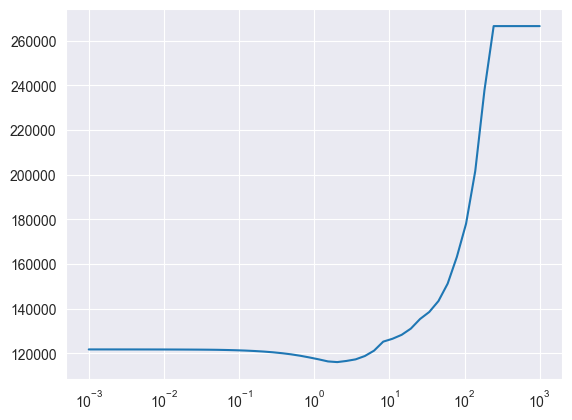

In [139]:
plt.plot(alpha_list, mse_list)
plt.xscale('log')

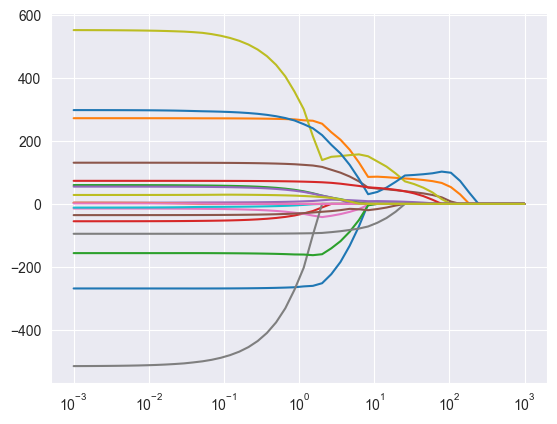

In [141]:
plt.plot(alpha_list, coef_list)
plt.xscale('log')